<a href="https://colab.research.google.com/github/sheinviktoriia/Data-analyst-home-works-/blob/main/HW_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('drive/MyDrive/PythonforDA/data/yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

In [4]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

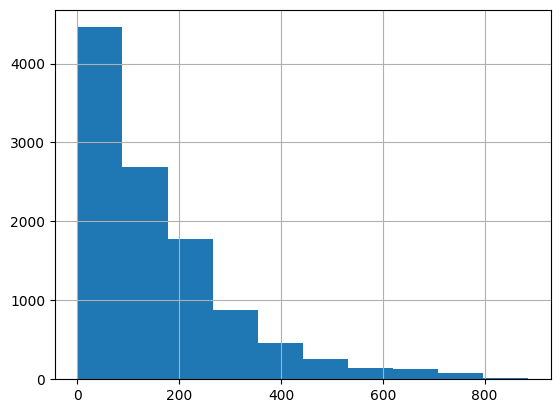

In [5]:
df['registered'].hist();

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

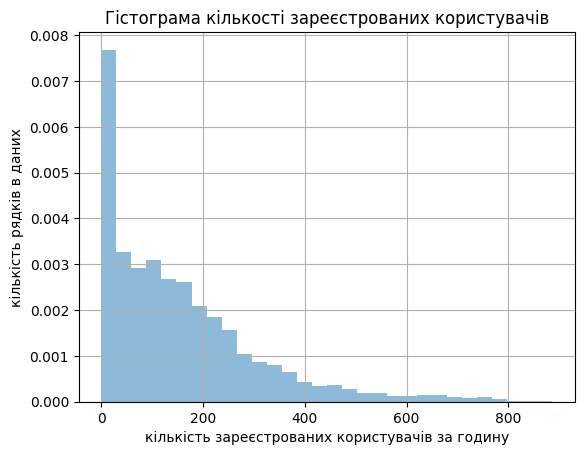

In [6]:
df['registered'].hist(bins=30, density=True,alpha=.5)
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('кількість зареєстрованих користувачів за годину')
plt.ylabel('кількість рядків в даних');

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [7]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [8]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [9]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [31]:
no_registration = df[df['registered'] == 0].groupby('dayofweek')['registered'].count()
no_registration = pd.DataFrame(no_registration)
no_registration

,registered
dayofweek,
0,5
1,3
2,2
3,1
4,1
5,1
6,2


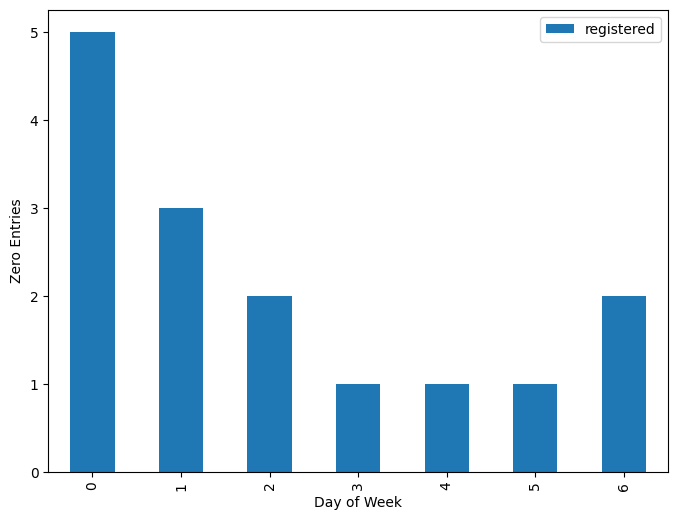

In [36]:
no_registration.plot.bar(figsize=(8,6))
plt.xlabel('Day of Week')
plt.ylabel('Zero Entries');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [53]:
registration_due_to_weather = pd.DataFrame(df.groupby('weather')['registered'].sum())

In [58]:
registration_due_to_weather.T

weather,1,2,3,4
registered,1186163,419914,87106,158


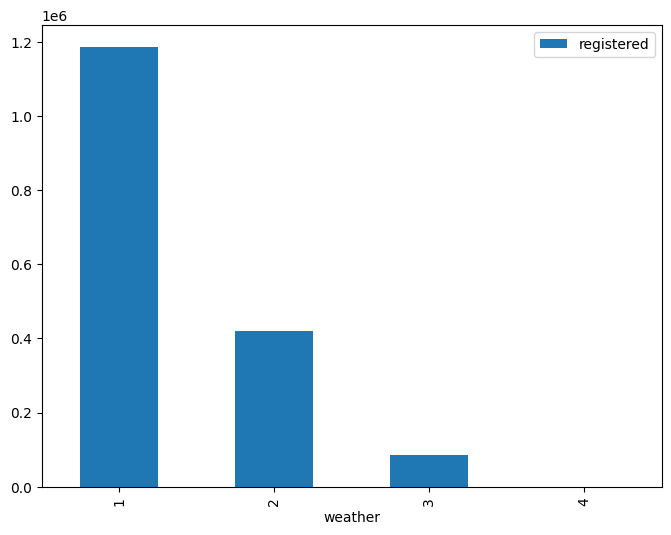

In [76]:
registration_due_to_weather.plot.bar(figsize = (8, 6));

На мою думку, стовпчата діаграма не дуже інформативна в цьому випадку, так як кількість значень дуже відрізняється. Можливо, було б доцільніше побудувати пайчарт і подивитись значення у відсотках.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

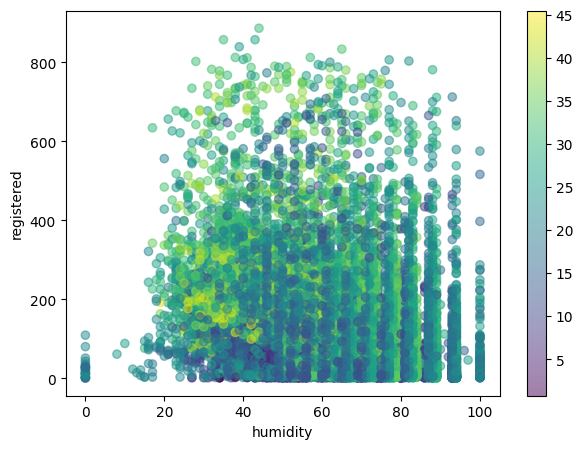

In [75]:
x = 'humidity'
y = 'registered'

plt.figure(figsize=(7,5))
plt.scatter(df[x], df[y], alpha=0.5,
            c = df.atemp)

plt.xlabel(x)
plt.ylabel(y)
plt.colorbar();


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)

**Відповідь на питання**
З графіка можна зробити наступні спостереження:

1. **Відсутність чіткої тенденції**: Дані не показують явної кореляції між вологістю і кількістю зареєстрованих користувачів. Точки розсіяні досить рівномірно по осі вологості, особливо в середньому діапазоні.

2. **Широкий діапазон зареєстрованих користувачів**: При низьких і високих рівнях вологості спостерігається широкий діапазон кількості зареєстрованих користувачів, що свідчить про те, що інші чинники, окрім вологості, можуть суттєво впливати на кількість поїздок.

3. **Колірна шкала**: Колір точок варіюється від блакитного до жовтого, що відображає зміну відчуваної температури від низьких до високих значень. На графіку не спостерігається яскраво вираженої залежності між відчуваною температурою та кількістю зареєстрованих користувачів; проте здається, що при вищих відчуваних температурах кількість користувачів може бути трохи більшою.

4. **Зменшення кількості зареєстрованих користувачів при високій вологості**: При дуже високій вологості (близько 100%) кількість зареєстрованих користувачів знижується, що може вказувати на негативний вплив високої вологості на бажання людей використовувати велосипед.

5. При показнику вологості 0 - 20 дуже мала, а при 0 - 10 взагалі відсутня. З графіка твкож видно, що при дуже низькій вологості реєстрації є тільки у випадку, якщо температура відчувається в межах ~ 15-20 градусів.
Можна сказати, що відчуття температури має більший вплив при рішенні зареєструватись, ніж вологість. При мінімальний вологості реєстрації відсутні, тоді як при мінімальних температурах (по відчуттях) все ж багато значень.